# Machine Vision 2022/23 - Assignment 4: Colors and Segmentation

In [18]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color

#### Part 1: Color Spaces

In this exercise, we want to understand different color spaces.

In [19]:
# @student: load the image stored under "res/flower.png"
input_img = skimage.io.imread("res/flower.png")

# @student: convert the image into float representation (from 0-255 to 0.0-1.0)
input_img = input_img / 255
assert input_img.dtype == float, "incorrect conversion to float"
assert np.min(input_img) >= 0.0, "incorrect conversion to float"
assert np.max(input_img) <= 1.0, "incorrect conversion to float"

To achieve a better understanding of the different color spaces, we want to understand their individual channels.
For this purpose, we will plot the channels individually.

You are free to change the `input_img` variable to a different image provided in the `res` directory.

##### RGB Color Space
The RGB color space has three additive channels, where each channel represents one color.

<br>
<img src="res/rgb.png" width="350">

This figure visualizes the `RGB` color space.
 - `R` (channel 0) represents the color red.
 - `G` (channel 1) represents the color blue.
 - `B` (channel 2) represents the color green.

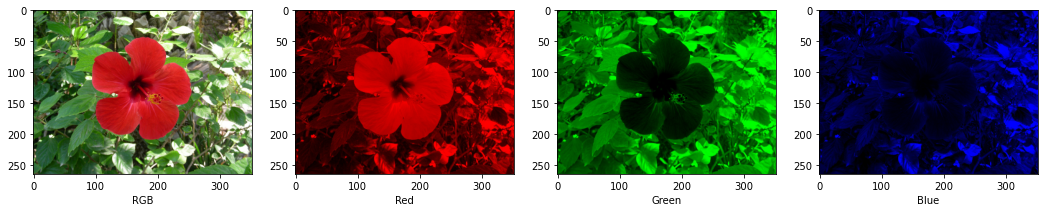

In [20]:
def extract_rgb_dim(*, img_rgb: np.ndarray, channel: int) -> np.ndarray:
    img_rgb_channel = copy.deepcopy(img_rgb)

    # @student: mask all values in the image that are not in the desired channel with 0
    #           hint: image shape is [v, u, c]
    if channel == 0:
        hide_idx = [1,2]
    elif channel == 1:
        hide_idx = [0,2]
    else:
        hide_idx = [0,1]
    img_rgb_channel[:,:,hide_idx] = 0

    return img_rgb_channel

input_img_r = extract_rgb_dim(img_rgb=input_img, channel=0)
input_img_g = extract_rgb_dim(img_rgb=input_img, channel=1)
input_img_b = extract_rgb_dim(img_rgb=input_img, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax1.set_xlabel("RGB")
ax2.imshow(input_img_r)
ax2.set_xlabel("Red")
ax3.imshow(input_img_g)
ax3.set_xlabel("Green")
ax4.imshow(input_img_b)
ax4.set_xlabel("Blue")
plt.show()

##### HSV Color Space

The HSV color space contains three channels.

<br>
<img src="res/hsv.png" width="350">

This figure visualizes the `HSV` color space.
 - `H` (channel 0) represents the hue of the color.
 - `S` (channel 1) represents the saturation. The higher the saturation, the "stronger" the color.
 - `V` (channel 2) represents the luminance.


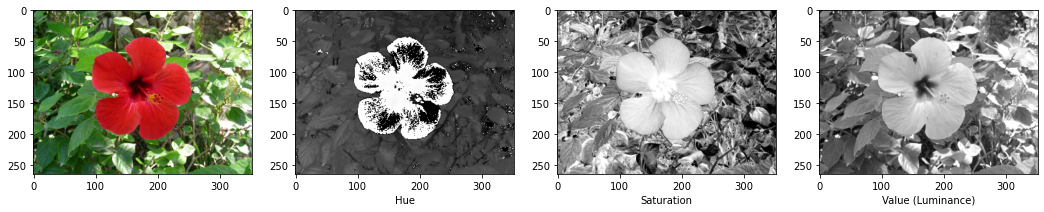

In [21]:
# @student: convert the image color space from rgb to hsv
#           hint: the skimage package (skimage.color) has different functions to convert between color spaces
flower_img_hsv = skimage.color.rgb2hsv(input_img)

def extract_hsv_dim(img_hsv: np.ndarray, channel: int) -> np.ndarray:
    return img_hsv[:,:,channel]

flower_img_h = extract_hsv_dim(img_hsv=flower_img_hsv, channel=0)
flower_img_s = extract_hsv_dim(img_hsv=flower_img_hsv, channel=1)
flower_img_v = extract_hsv_dim(img_hsv=flower_img_hsv, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax2.imshow(flower_img_h, cmap="gray")
ax2.set_xlabel("Hue")
ax3.imshow(flower_img_s, cmap="gray")
ax3.set_xlabel("Saturation")
ax4.imshow(flower_img_v, cmap="gray")
ax4.set_xlabel("Value (Luminance)")
plt.show()

##### LAB Color Space

The LAB color space contains three channels.

<br>
<img src="res/lab.png" width="350">

(Von Holger Everding - Eigenes Werk, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=38422442)

This figure visualizes the `LAB` color space.
 - `L` (channel 0) represents the luminance.
 - `a` (channel 1) represents the color from green to red.
 - `b` (channel 2) represents the color from blue to yellow.

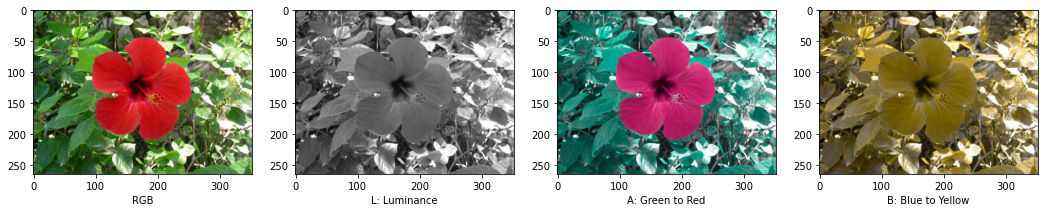

In [22]:
# @student: convert the image color space from rgb to lab
#           hint: the skimage package (skimage.color) has different functions to convert between color spaces
input_img_lab = skimage.color.rgb2lab(input_img)

def extract_lab_dim(img_lab: np.ndarray, channel: int) -> np.ndarray:
    img_lab_channel = copy.deepcopy(img_lab)

    # @student: always keep the luminance channel but hide other channels depending on the
    #           channel argument
    if channel == 0:
        channel_idx = [1,2]
    elif channel == 1:
        channel_idx = [2]
    else:
        channel_idx = [1]
    img_lab_channel[:,:,channel_idx] = 0

    # Channel "a" ranges from green to red, while Channel b ranges from blue to yellow.
    # Therefore, we cannot display the channels using a gray scale image and have to convert the channel
    # back to an RGB image
    #
    # @student: convert to the lab image back to rgb color space
    #           hint: the skimage package has different functions to convert between color spaces
    return skimage.color.lab2rgb(img_lab_channel)

input_img_l = extract_lab_dim(img_lab=input_img_lab, channel=0)
input_img_a = extract_lab_dim(img_lab=input_img_lab, channel=1)
input_img_b = extract_lab_dim(img_lab=input_img_lab, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax1.set_xlabel("RGB")
ax2.imshow(input_img_l)
ax2.set_xlabel("L: Luminance")
ax3.imshow(input_img_a)
ax3.set_xlabel("A: Green to Red")
ax4.imshow(input_img_b)
ax4.set_xlabel("B: Blue to Yellow")
plt.show()

#### Part 2: Segmentation using CCL

Implement the CCL algorithm for segmenting an image.
Use the euclidean distance in RGB color space as similarity measure.

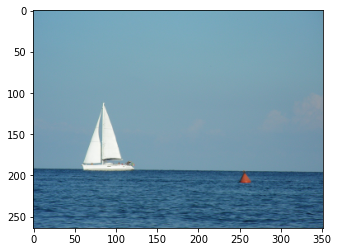

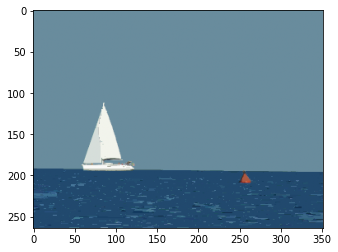

In [30]:
def similarity_measure(*, p1: np.ndarray, p2: np.ndarray) -> float:
    # @student: calculate the euclidean distance between p1 and p2
    return np.linalg.norm(p1 - p2)

def get_pixel(*, image: np.ndarray, u: int, v: int) -> np.ndarray:
    if v < 0:
        return None

    if u < 0:
        return None

    return image[v, u]

def ccl_segmentation(*, image: np.ndarray, threshold: float) -> np.ndarray:
    segmented_image = np.zeros_like(image)

    for v in range(image.shape[0]):
        for u in range(image.shape[1]):
            pixel = get_pixel(image=image, u=u, v=v)
            pixel_left = get_pixel(image=image, u=u-1, v=v)
            pixel_top = get_pixel(image=image, u=u, v=v-1)

            left_same = False
            if pixel_left is not None:
                left_same = similarity_measure(p1=pixel, p2=pixel_left) < threshold
            top_same = False
            if pixel_top is not None:
                top_same = similarity_measure(p1=pixel, p2=pixel_top) < threshold


            # Case 1: Left: similar color, Top: different color
            if left_same and not top_same:
                segmented_image[v, u] = segmented_image[v, u-1]
                continue

            # Case 2: Left: different color, Top: similar color
            if not left_same and top_same:
                segmented_image[v, u] = segmented_image[v-1, u]
                continue

            # Case 3: Left: different color, Top: different color
            if not left_same and not top_same:
                segmented_image[v, u] = pixel
                continue

            # Case 4 + 5: Left: similar color, Top: similar color
            segment_left = segmented_image[v, u-1]
            segment_top = segmented_image[v-1, u]
            if left_same and top_same and np.array_equal(segment_left, segment_top):
                # Case 4: Same Segments
                segmented_image[v, u] = segmented_image[v-1, u]
                continue
            else:
                # Case 5: Different Segments
                mask_left = np.all(segmented_image == segment_left, axis=-1)
                mask_top = np.all(segmented_image == segment_top, axis=-1)
                segmented_image[mask_left] = pixel
                segmented_image[mask_top] = pixel
                segmented_image[v, u] = pixel

    return segmented_image

# @student: first load the boat image and convert the image into float representation (from 0-255 to 0.0-1.0)
img_boat_rgb = skimage.io.imread("res/boat.png")
img_boat_rgb = img_boat_rgb.astype(float) / 255
plt.imshow(img_boat_rgb)
plt.show()

# @student: apply the ccl algorithm to the image and visualize the results
#           test different values for the threshold hyperparameter
segmented_img = ccl_segmentation(image=img_boat_rgb, threshold=15 / 255)
plt.imshow(segmented_img)
plt.show()

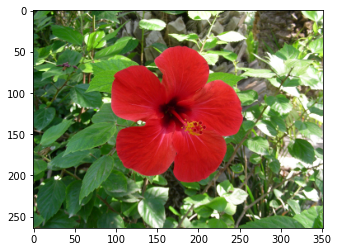

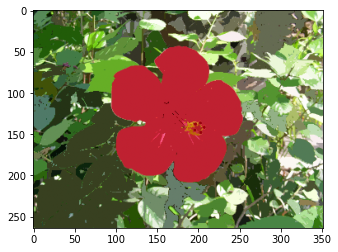

In [24]:
# @student: apply the ccl algorithm to the remaining images in the "res" directory
#           test different thresholds to obtain good results
img_flower_rgb = skimage.io.imread("res/flower.png")
img_flower_rgb = img_flower_rgb.astype(float) / 255
plt.imshow(img_flower_rgb)
plt.show()

segmented_img = ccl_segmentation(image=img_flower_rgb, threshold=20 / 255)
plt.imshow(segmented_img)
plt.show()

#### Part 3: Segmentation using K-Means

Implement the K-means algorithm for segmenting an image.

In [25]:
def calculate_random_centroids(*, image: np.ndarray, k: int) -> np.ndarray:
    # @student: create k centroids based on random pixels within the image
    k_indices = np.random.choice(image.shape[0] * image.shape[1], k, replace=False)
    k_indices = np.unravel_index(k_indices, image.shape[:2])
    return image[k_indices]


def calculate_distance(*, image: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    # @student: for each pixel calculate the distance to each centroid
    # hint: the result should have the shape [v, u, k], where v and u are the pixel
    #       coordinates and k is the centroid
    #
    #       you can use the euclidean_distance as distance measure

    centroid_distances = np.zeros(shape=[image.shape[0], image.shape[1], len(centroids)])
    for idx, centroid in enumerate(centroids):
        centroid_distances[:,:,idx] = np.linalg.norm(image - centroid, axis=-1)

    return centroid_distances


def calculate_new_centroids(*, image: np.ndarray, centroids: np.ndarray, pixel_centroid_matching: np.ndarray) -> np.ndarray:
    new_centroids = np.zeros_like(centroids)
    for idx in range(len(centroids)):
        pixels_for_centroid = image[pixel_centroid_matching == idx]
        new_centroids[idx, :] = pixels_for_centroid.mean(axis=0)

    return new_centroids


def k_means_image_segmentation(*, image: np.ndarray, k: int) -> np.ndarray:
    centroids = calculate_random_centroids(image=image, k=k)

    centroids_changed = True
    while centroids_changed:
        centroid_distances = calculate_distance(image=image, centroids=centroids)

        # @student: Extract the new centroid based on the closest distance per pixel
        pixel_centroid_matching = np.argmin(centroid_distances, axis=-1)

        new_centroids = calculate_new_centroids(
            image=image,
            centroids=centroids,
            pixel_centroid_matching=pixel_centroid_matching
        )

        # Check if the centroids have changed
        centroids_same = np.all(np.all(centroids == new_centroids, axis=-1))
        centroids_changed = not centroids_same
        # change centroids to new centroids and continue iteration until the centroids converged
        centroids = new_centroids

    # @student: create a new image that contains the segmented colors
    segmented_img = np.ndarray(shape=image.shape)
    for idx in range(k):
        segmented_img[pixel_centroid_matching == idx] = centroids[idx]

    return segmented_img

Apply the k-means algorithm in different color spaces to different images.
Start by using the `res/boat.png` image. Try to choose a good value for the hyperparameter `k`

Do you notice a difference between the color spaces?

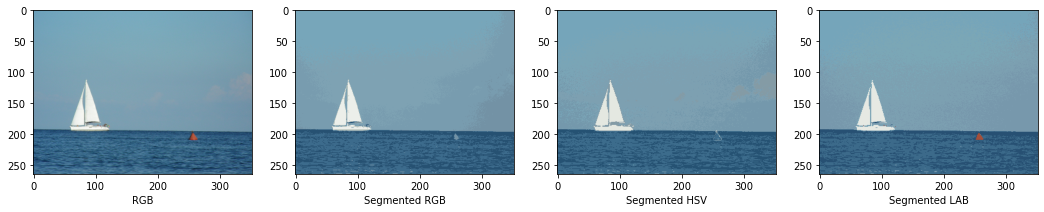

In [26]:
# @student: load the boat image and convert the image into float representation (from 0-255 to 0.0-1.0)
img_boat_rgb = skimage.io.imread("res/boat.png")
img_boat_rgb = img_boat_rgb.astype(float) / 255

# @student: try different values for the hyperparameter k
k = 8

# @student: apply k-means in rgb (variable name: segmented_img_kmeans_rgb)
segmented_img_kmeans_rgb = k_means_image_segmentation(image=img_boat_rgb, k=k)

# @student: apply k-means in hsv (variable name: segmented_img_kmeans_hsv)
img_boat_hsv = skimage.color.rgb2hsv(img_boat_rgb)
segmented_img_kmeans_hsv = k_means_image_segmentation(image=img_boat_hsv, k=k)
segmented_img_kmeans_hsv_rgb = skimage.color.hsv2rgb(segmented_img_kmeans_hsv)

# @student: apply k-means in lab (variable name: segmented_img_kmeans_lab)
img_boat_lab = skimage.color.rgb2lab(img_boat_rgb)
segmented_img_kmeans_lab = k_means_image_segmentation(image=img_boat_lab, k=k)
segmented_img_kmeans_lab_rgb = skimage.color.lab2rgb(segmented_img_kmeans_lab)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(img_boat_rgb)
ax1.set_xlabel("RGB")
ax2.imshow(segmented_img_kmeans_rgb)
ax2.set_xlabel("Segmented RGB")
ax3.imshow(segmented_img_kmeans_hsv_rgb)
ax3.set_xlabel("Segmented HSV")
ax4.imshow(segmented_img_kmeans_lab_rgb)
ax4.set_xlabel("Segmented LAB")
plt.show()